#HW1 - Data Exploration and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

In [ ]:
dataset.shape

(1250, 25)

# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset.conversations_per_day.value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.DataFrame(dataset)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=96)
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()
print(missing_train[missing_train > 0])
print(missing_test[missing_test > 0])

household_income    85
dtype: int64
household_income    24
dtype: int64


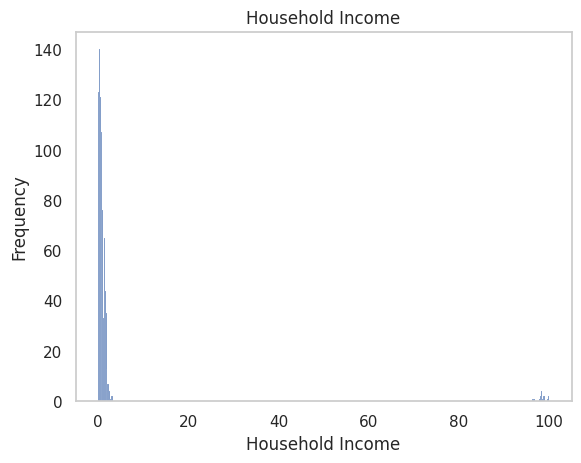

In [ ]:
plt.figure()
sns.histplot(train_data.household_income, kde=False)
plt.title('Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [ ]:
income_mean = train_data.household_income.mean()
income_median = train_data.household_income.median()

print('The mean value:', income_mean)
print('The median value:', income_median)

The mean value: 3.6405464480874317
The median value: 0.7


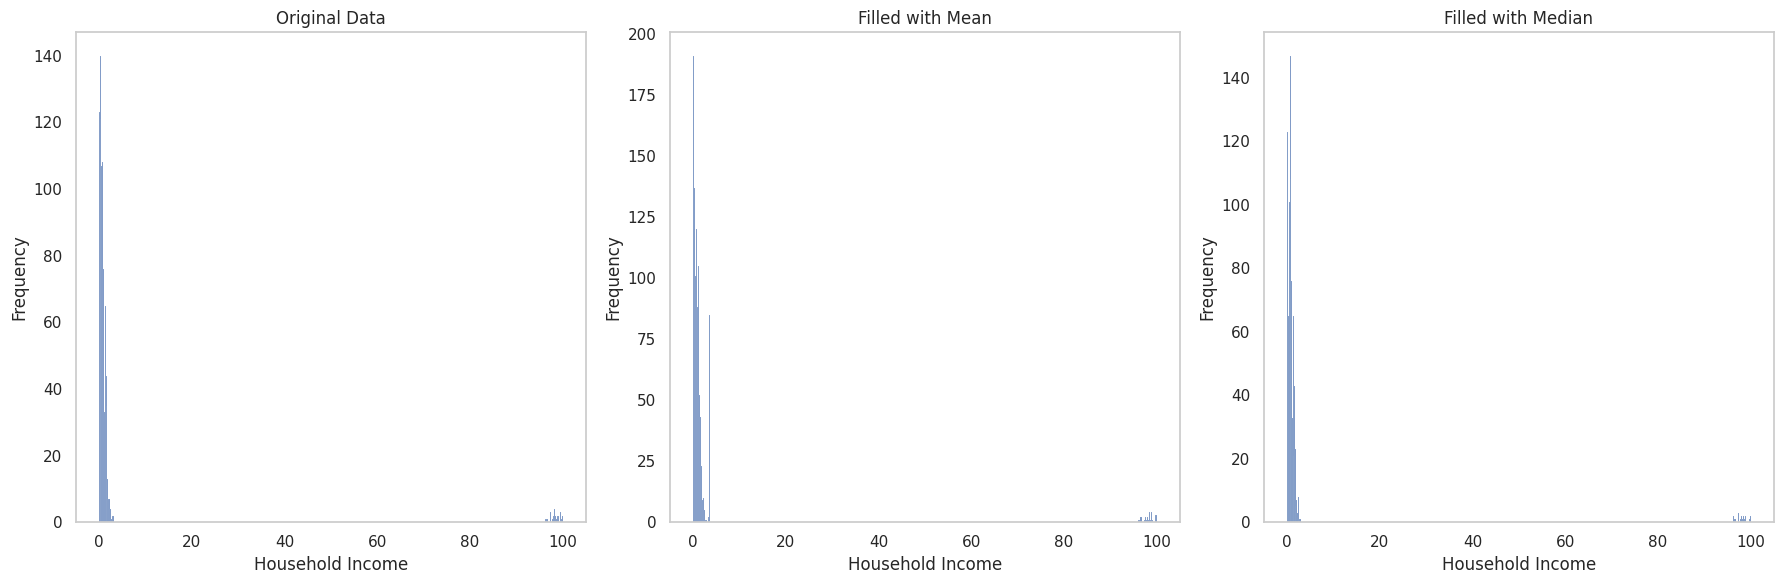

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(train_data.household_income, kde=False)
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.title('Original Data')
plt.grid()

# Fill with mean
train_data_filled_mean = train_data.copy()
train_data_filled_mean['household_income'].fillna(income_mean, inplace=True)
plt.subplot(1, 3, 2)
sns.histplot(train_data_filled_mean.household_income, kde=False)
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.title('Filled with Mean')
plt.grid()

# Fill with median
train_data_filled_median = train_data.copy()
train_data_filled_median['household_income'].fillna(income_median, inplace=True)
plt.subplot(1, 3, 3)
sns.histplot(train_data_filled_median.household_income, kde=False)
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.title('Filled with Median')
plt.grid()

plt.tight_layout()
plt.show()

**Task A**

In [ ]:
train_data['household_income'].fillna(income_median, inplace=True)
test_data['household_income'].fillna(income_median, inplace=True)

**Task B**

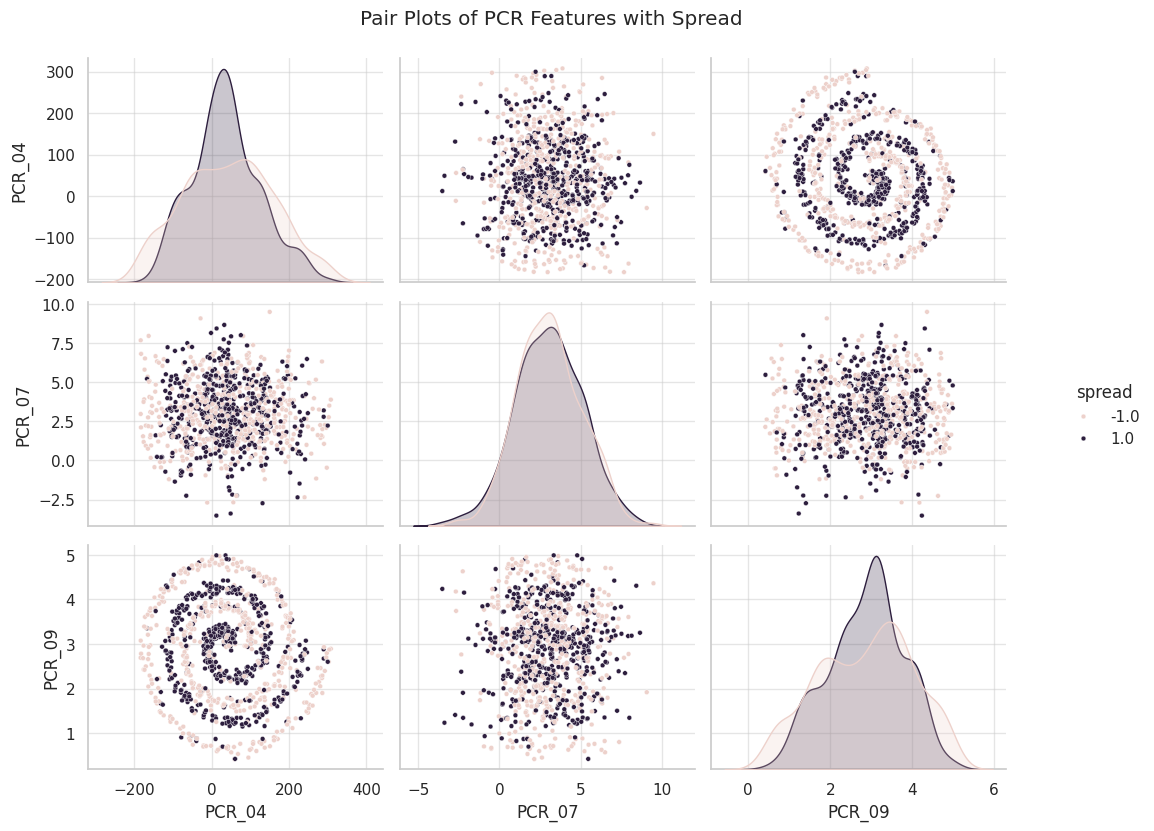

In [ ]:
PCR_features = ['PCR_04', 'PCR_07', 'PCR_09']
pair_plot = sns.pairplot(train_data, vars=PCR_features, hue='spread', plot_kws={'s': 12})
pair_plot.fig.suptitle("Pair Plots of PCR Features with Spread", y=1.04)

for ax in pair_plot.axes.flatten():
    ax.grid(alpha=0.5)

pair_plot.fig.set_size_inches(12, 8)
plt.show()

**Q8**

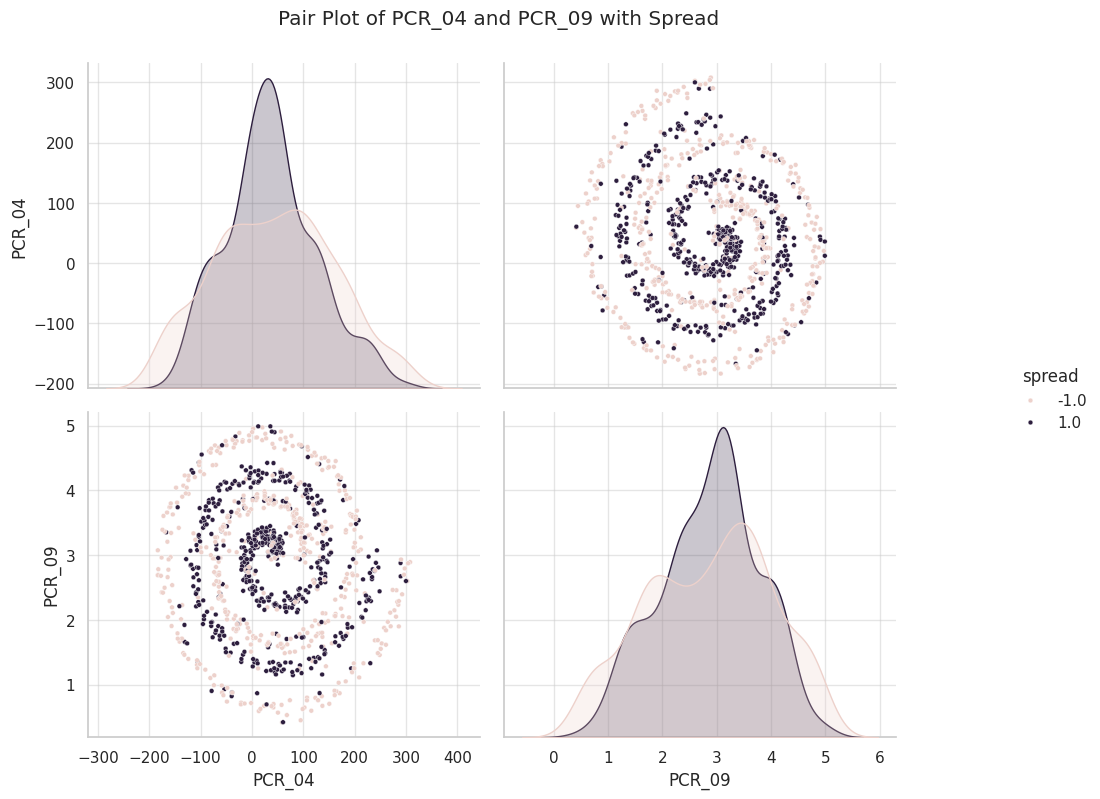

In [ ]:
selected_pair_plot = sns.pairplot(train_data, vars=['PCR_04', 'PCR_09'], hue='spread', plot_kws={'s': 12})
selected_pair_plot.fig.suptitle("Pair Plot of PCR_04 and PCR_09 with Spread", y=1.04)

for ax in selected_pair_plot.axes.flatten():
    ax.grid(alpha=0.5)

selected_pair_plot.fig.set_size_inches(12, 8)
plt.show()

**Task C**

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors: int = 3):
        self.n_neighbors = n_neighbors

    def fit(self, X, Y):
        self.X_train = np.copy(X)
        self.Y_train = np.copy(Y)
        return self

    def predict(self, X):
        distances = cdist(X, self.X_train, 'euclidean')

        nearest_indices = np.argpartition(distances, self.n_neighbors, axis=1)[:, :self.n_neighbors]

        nearest_labels = self.Y_train[nearest_indices]

        predictions = np.sign(np.sum(nearest_labels, axis=1))

        return predictions

**Task D**

In [ ]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


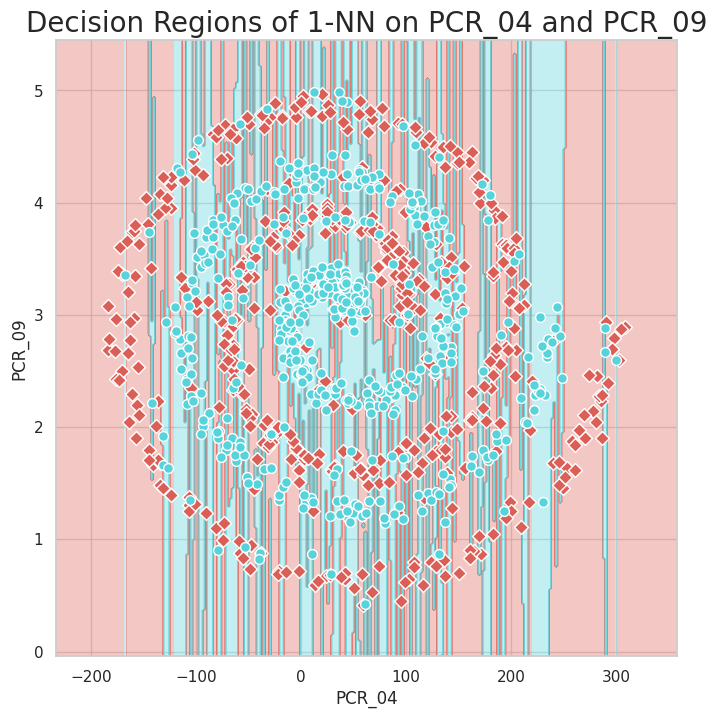

Training Accuracy:  1.0
Test Accuracy:  0.616


In [ ]:
features = ['PCR_04', 'PCR_09']
X_train = train_data[features].values
y_train = train_data['spread'].values
X_test = test_data[features].values
y_test = test_data['spread'].values

knn_model = kNN(n_neighbors=1)
knn_model.fit(X_train, y_train)

visualize_clf(knn_model, X_train, y_train, xlabel=features[0], ylabel=features[1], title='Decision Regions of 1-NN on PCR_04 and PCR_09')
training_accuracy = knn_model.score(X_train, y_train)
print(f"Training Accuracy: ", training_accuracy)
test_accuracy = knn_model.score(X_test, y_test)
print(f"Test Accuracy: ", test_accuracy)
plt.show()

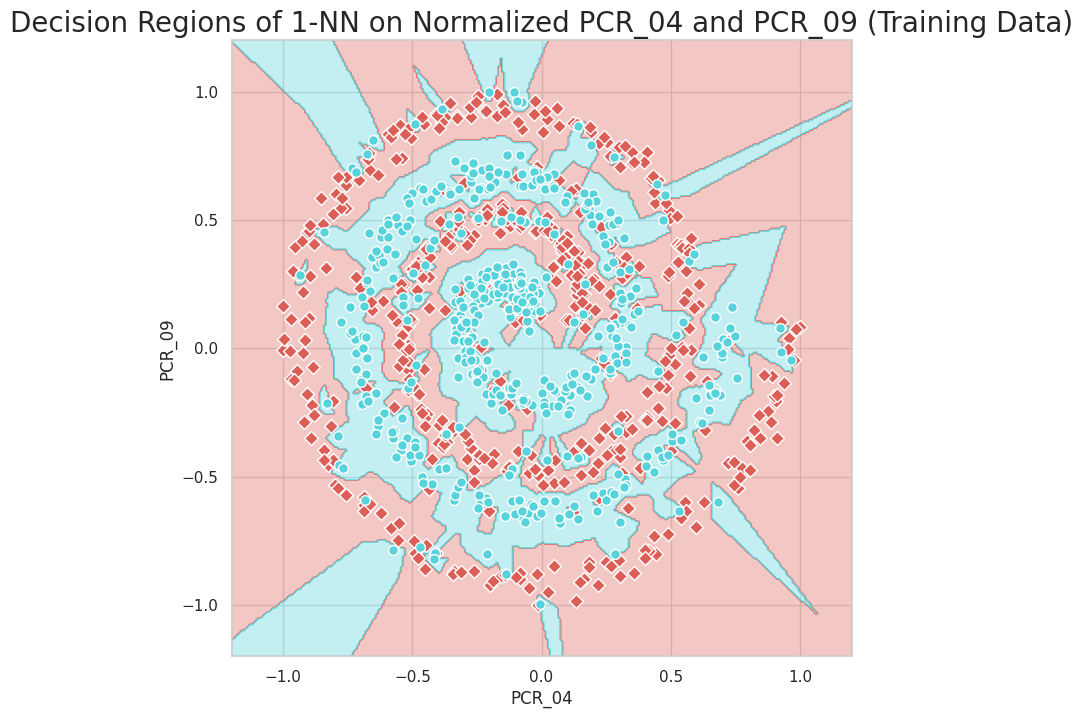

Training Accuracy (Normalized): 1.00
Test Accuracy (Normalized): 0.72


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model_normalized = kNN(n_neighbors=1)
knn_model_normalized.fit(X_train_scaled, y_train)


visualize_clf(knn_model_normalized, X_train_scaled, y_train, xlabel=features[0], ylabel=features[1],
              title='Decision Regions of 1-NN on Normalized PCR_04 and PCR_09 (Training Data)')
training_accuracy_normalized = knn_model_normalized.score(X_train_scaled, y_train)
print(f"Training Accuracy (Normalized): {training_accuracy_normalized:.2f}")
test_accuracy_normalized = knn_model_normalized.score(X_test_scaled, y_test)
print(f"Test Accuracy (Normalized): {test_accuracy_normalized:.2f}")

plt.show()

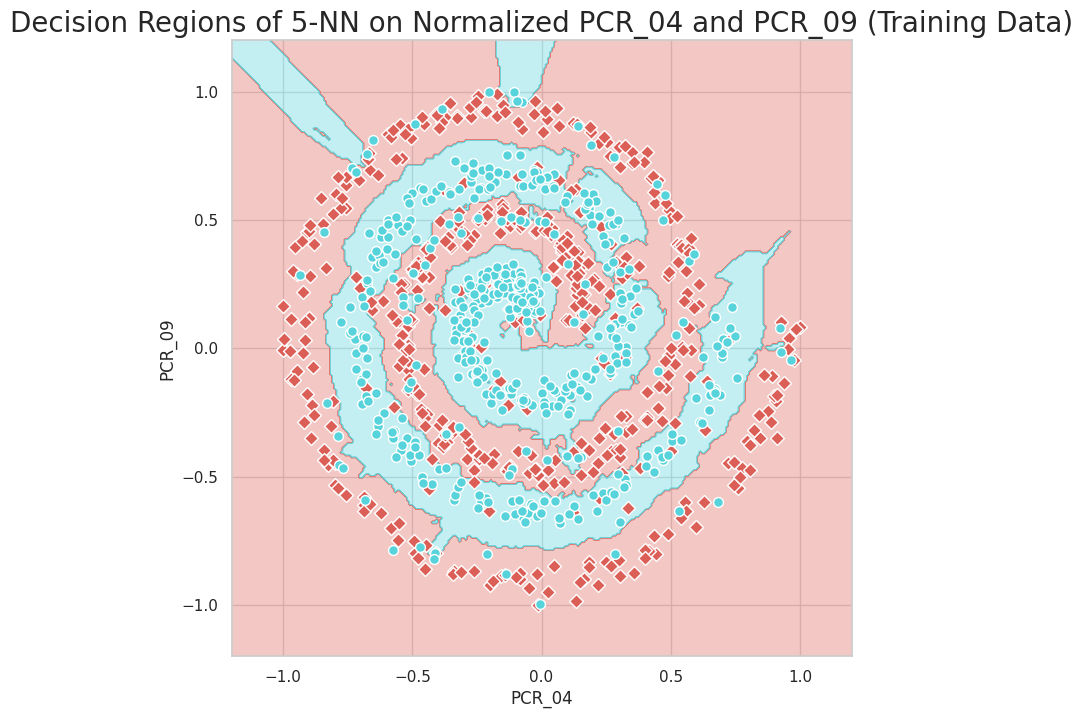

Training Accuracy (Normalized): 0.85
Test Accuracy (Normalized): 0.80


In [ ]:
five_nn_model_normalized = kNN(n_neighbors=5)
five_nn_model_normalized.fit(X_train_scaled, y_train)


visualize_clf(five_nn_model_normalized, X_train_scaled, y_train, xlabel=features[0], ylabel=features[1],
              title='Decision Regions of 5-NN on Normalized PCR_04 and PCR_09 (Training Data)')
training_accuracy_normalized = five_nn_model_normalized.score(X_train_scaled, y_train)
print(f"Training Accuracy (Normalized): {training_accuracy_normalized:.2f}")
test_accuracy_normalized = five_nn_model_normalized.score(X_test_scaled, y_test)
print(f"Test Accuracy (Normalized): {test_accuracy_normalized:.2f}")

plt.show()

**Task E**

In [ ]:
train_data['SpecialProperty'] = train_data['blood_type'].isin(['O+','B+'])
train_data.drop(columns=['blood_type'],inplace = True)

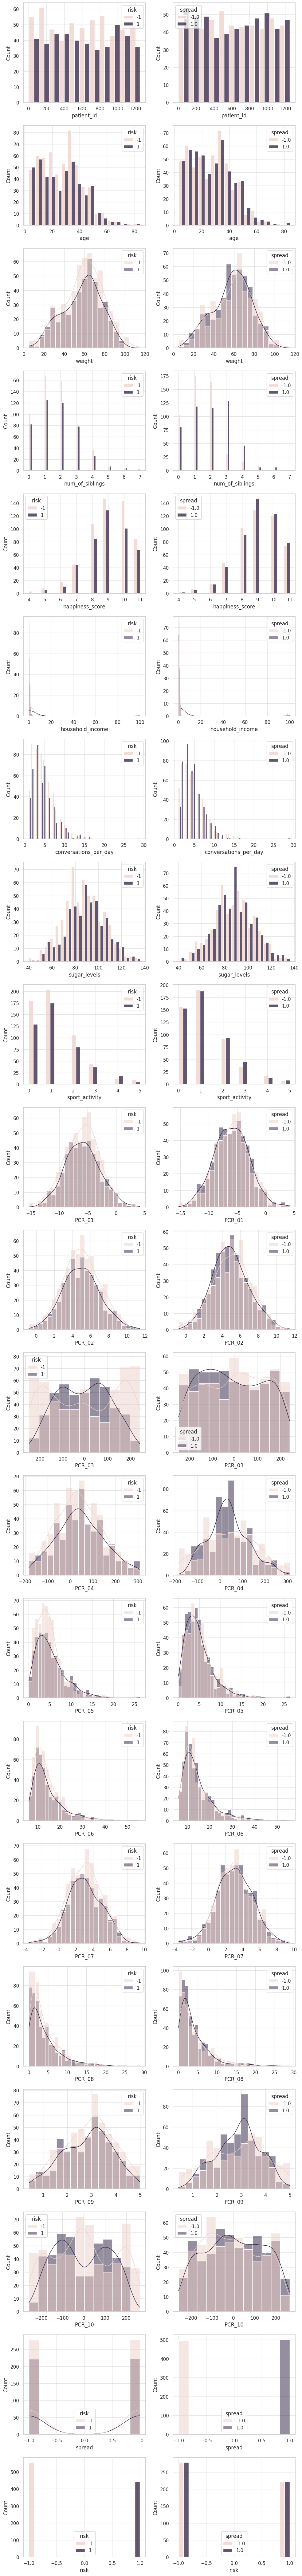

In [ ]:
COL_NAME = train_data.select_dtypes(include=['int', 'float']).columns.tolist()
COLS, ROWS = (2, len(COL_NAME))

plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)

    isContinuous = "float" in df[column].dtype.name
    sns.histplot(data=train_data, x=column, hue=cls, line_kws={"linewidth": 1},
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)

plt.tight_layout()


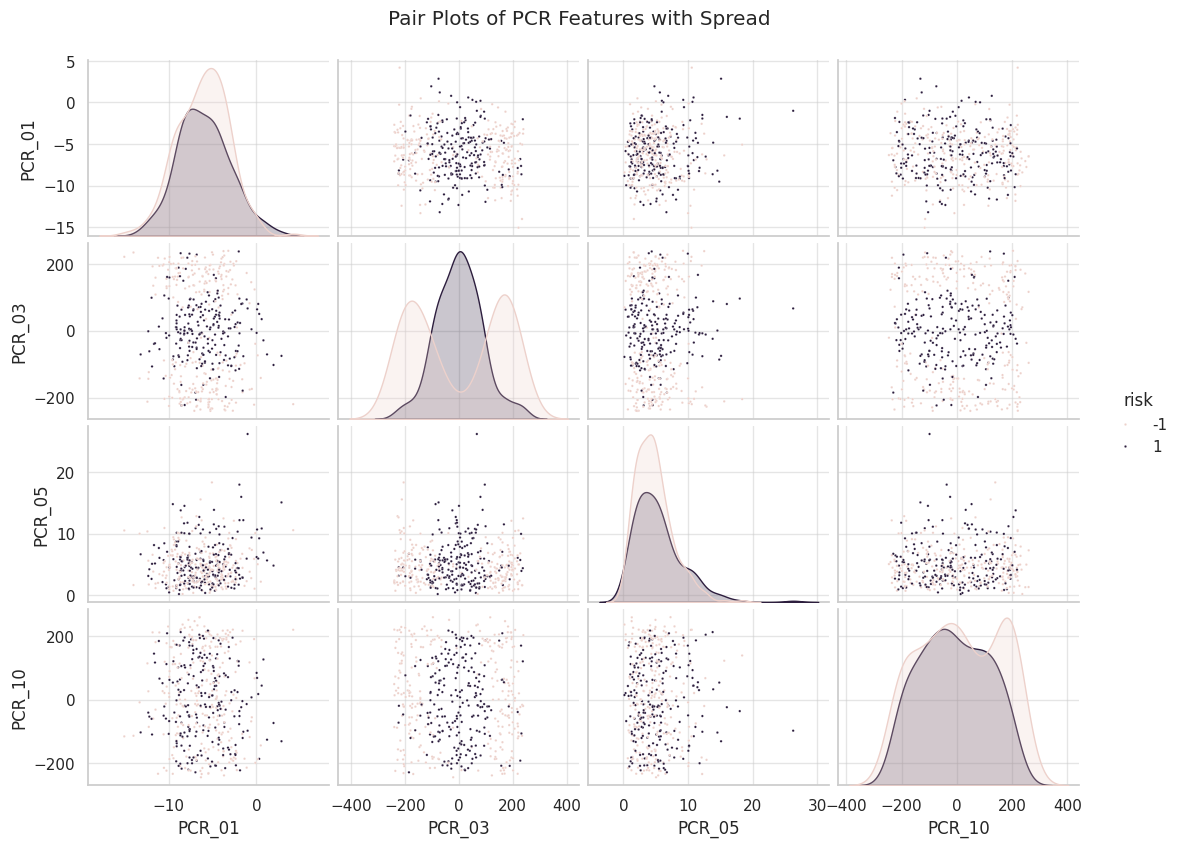

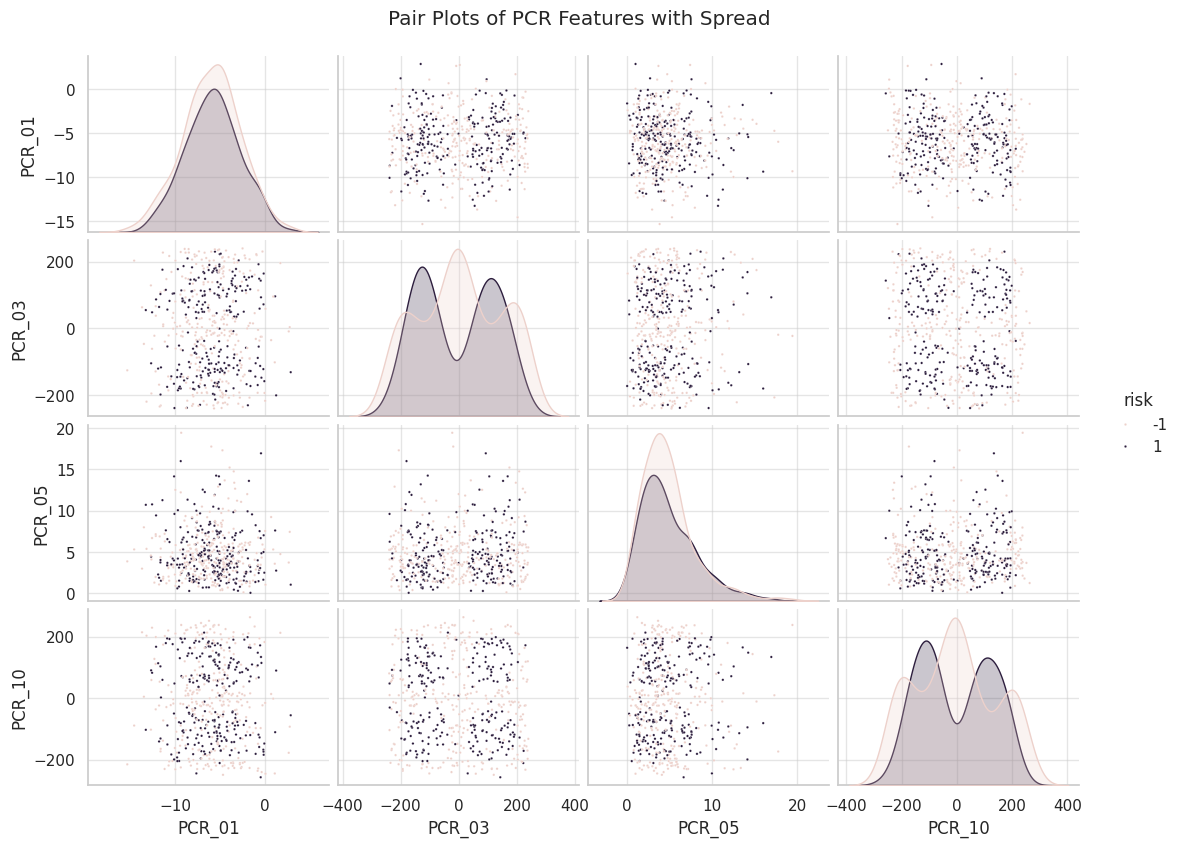

In [ ]:
train_data_SpecialProperty = train_data[(train_data.SpecialProperty == True)]
train_data_notSpecialProperty = train_data[(train_data.SpecialProperty == False)]

PCR_features = ['PCR_01', 'PCR_03' , 'PCR_05' , 'PCR_10']
pair_plot = sns.pairplot(train_data_SpecialProperty, vars=PCR_features , hue='risk', plot_kws={'s': 3})
pair_plot.fig.suptitle("Pair Plots of PCR Features with Spread", y=1.04)

for ax in pair_plot.axes.flatten():
    ax.grid(alpha=0.5)

pair_plot.fig.set_size_inches(12, 8)
plt.show()
pair_plot = sns.pairplot(train_data_notSpecialProperty, vars=PCR_features, hue='risk', plot_kws={'s': 3})
pair_plot.fig.suptitle("Pair Plots of PCR Features with Spread", y=1.04)

for ax in pair_plot.axes.flatten():
    ax.grid(alpha=0.5)

pair_plot.fig.set_size_inches(12, 8)
plt.show()

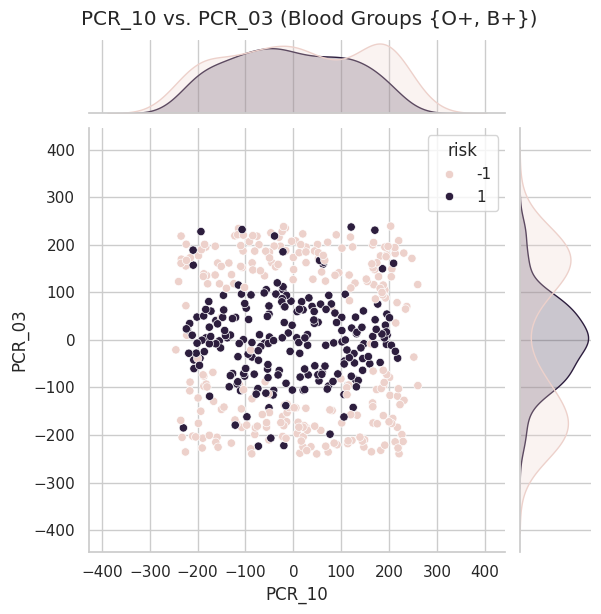

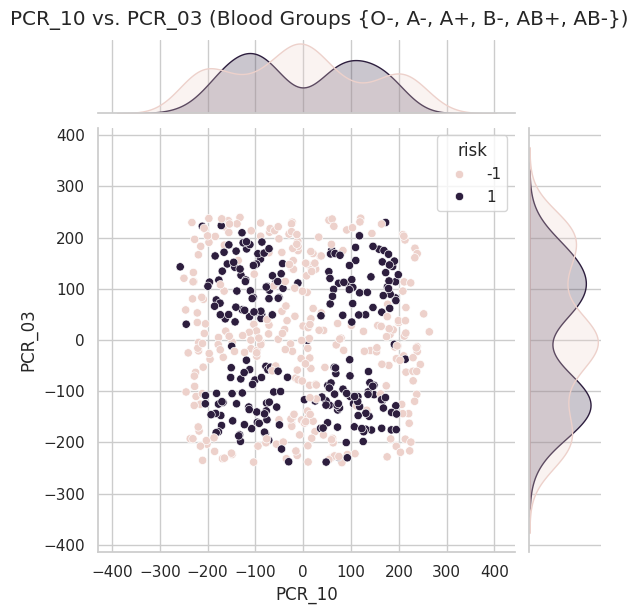

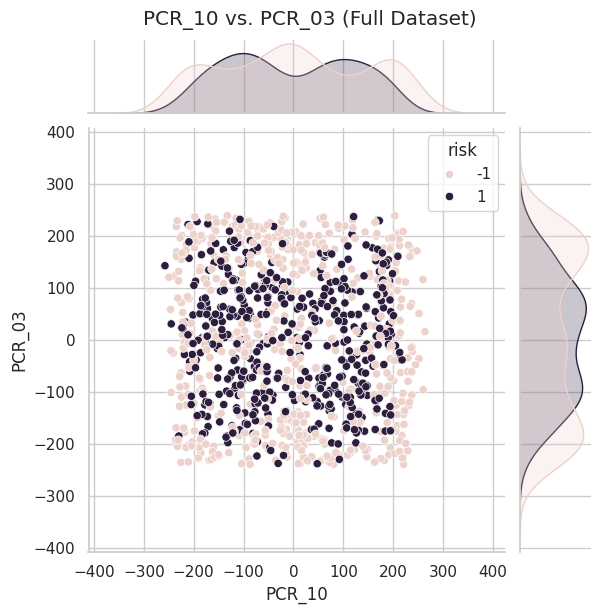

In [ ]:
sns.set(style="whitegrid")
g1 = sns.jointplot(x="PCR_10", y="PCR_03", data=train_data_SpecialProperty, hue="risk", kind="scatter", height=6)
g1.fig.suptitle("PCR_10 vs. PCR_03 (Blood Groups {O+, B+})", y=1.02)
g2 = sns.jointplot(x="PCR_10", y="PCR_03", data=train_data_notSpecialProperty, hue="risk", kind="scatter", height=6)
g2.fig.suptitle("PCR_10 vs. PCR_03 (Blood Groups {O-, A-, A+, B-, AB+, AB-})", y=1.02)
g3 = sns.jointplot(x="PCR_10", y="PCR_03", data=train_data, hue="risk", kind="scatter", height=6)
g3.fig.suptitle("PCR_10 vs. PCR_03 (Full Dataset)", y=1.02)

plt.show()

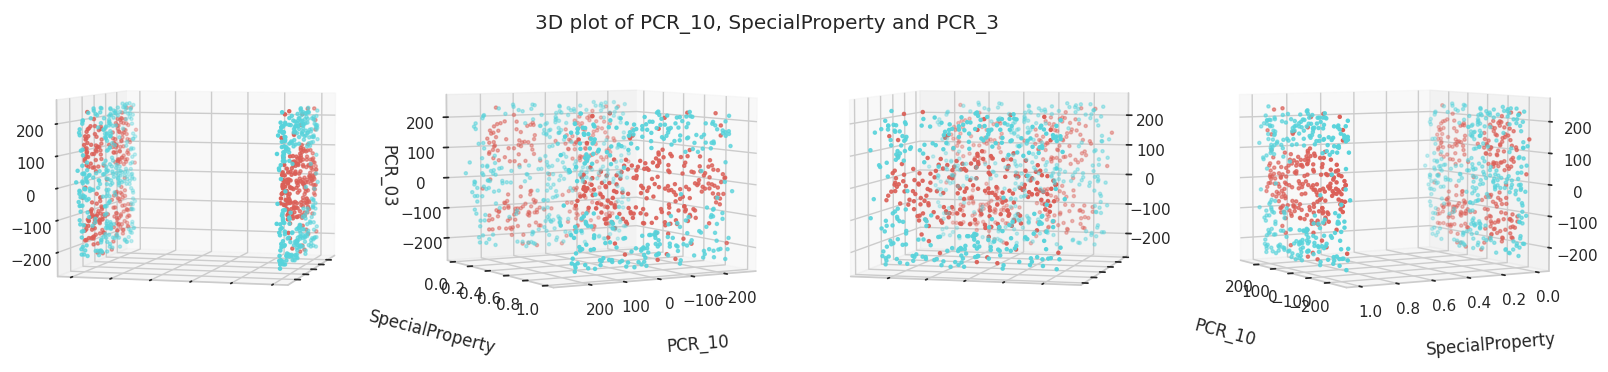

In [ ]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

plot3d(train_data, "PCR_10", "SpecialProperty", "PCR_03", title="3D plot of PCR_10, SpecialProperty and PCR_3", hue="risk", s=5)

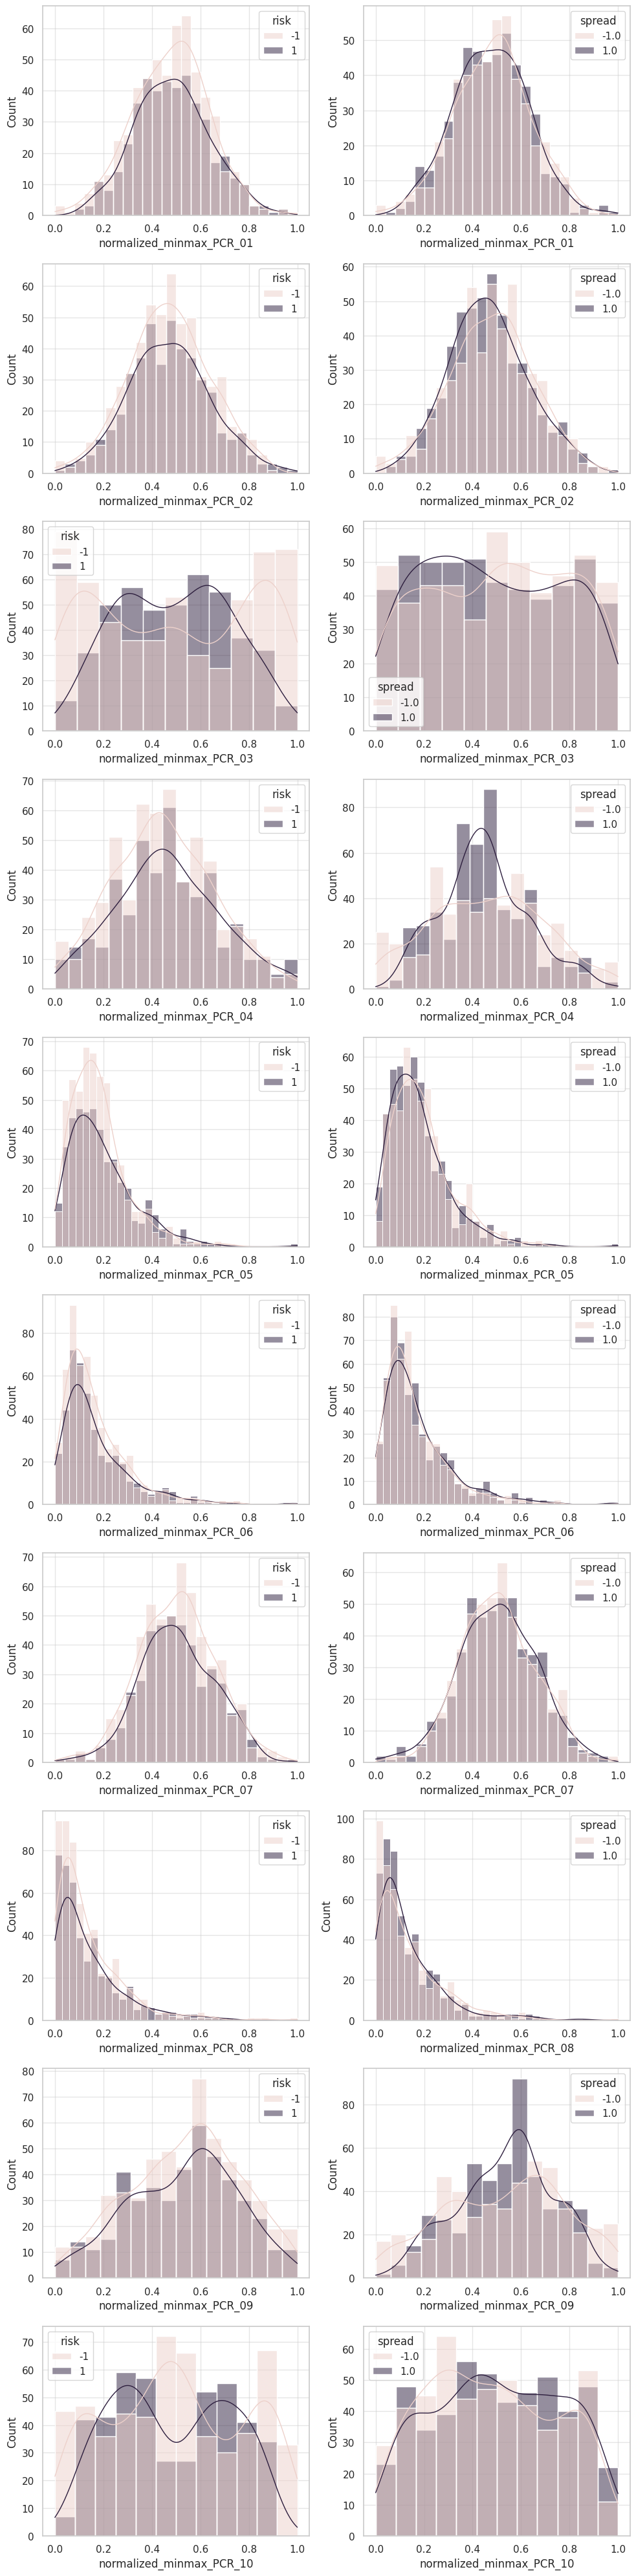

In [ ]:
features = train_data.filter(like='PCR').columns.tolist()
COLS, ROWS = (2, len(features))
plt.figure(figsize=(5 * COLS, 4 * ROWS))

for row in range(ROWS):
  column = features[row]
  max = train_data[column].max()
  min = train_data[column].min()
  mean = train_data[column].mean()
  std = train_data[column].std()
  normalised_sd_colomn = f'normalized_standard_{column}'
  normalised_mm_colomn = f'normalized_minmax_{column}'
  train_data[normalised_mm_colomn] = [(x-min)/(max-min) for x in train_data[column]]
  train_data[normalised_sd_colomn] = [(x-mean)/std for x in train_data[column]]
  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
    sns.histplot(data=train_data, x=normalised_mm_colomn, hue=cls, line_kws={"linewidth": 1},
                 kde=True, multiple="layer")
    plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
def prepare_data(training_data, new_data):
    res = new_data.copy()
    res['SpecialProperty'] = res['blood_type'].isin(['O+','B+'])
    res.drop(columns=['blood_type'],inplace = True)
    num_cols = res.select_dtypes(include=['int', 'float']).columns
    res[num_cols] = res[num_cols].fillna(res[num_cols].median())
    features = res.filter(like='PCR').columns.tolist()
    for feature in features:
        mean = training_data[feature].mean()
        std = training_data[feature].std()
        max = training_data[feature].max()
        min = training_data[feature].min()
        normalised_mm_colomn = f'normalized_minmax_{feature}'
        normalised_sd_colomn = f'normalized_standard_{feature}'
        res[normalised_mm_colomn] = [(x-min)/(max-min) for x in res[feature]]
        res[normalised_sd_colomn] = [(x-mean)/std for x in res[feature]]
    return res



In [ ]:
# Prepare training set according to itself
train_df_prepared = prepare_data(train_data, train_data)

# Prepare test set according to the raw training set
test_df_prepared = prepare_data(train_data, test_data)


In [ ]:
print(test_df_prepared.columns)

Index(['patient_id', 'age', 'sex', 'weight', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk', 'SpecialProperty',
       'normalized_minmax_PCR_01', 'normalized_standard_PCR_01',
       'normalized_minmax_PCR_02', 'normalized_standard_PCR_02',
       'normalized_minmax_PCR_03', 'normalized_standard_PCR_03',
       'normalized_minmax_PCR_04', 'normalized_standard_PCR_04',
       'normalized_minmax_PCR_05', 'normalized_standard_PCR_05',
       'normalized_minmax_PCR_06', 'normalized_standard_PCR_06',
       'normalized_minmax_PCR_07', 'normalized_standard_PCR_07',
       'normalized_minmax_PCR_08', 'normalized_standard_PCR_08',
       'normalized_minmax_PCR_09', 'normalized_standard_PCR_09',
       'normalized_minmax_PCR_10', 'normalized_standard_